# Classifier (Using PCA) for Machine Learning Basics - Activity 3

## Brief


## Initial Script

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
plt.close("all")
import time
import pandas as pd

import sklearn.datasets as skl_datasets
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [2]:
# Main Variables

n_classes = 3
n_samples = 10000 
n_dim = 10 # number of dimensions

## Functions

In [3]:
# Functions

def split_partition(X, y, train_split):
    # merge y (classifications) and X (co-ordinates)
    y = np.reshape(y, (len(y), 1))
    Xy = np.concatenate((X, y), axis=1)
    
    # split dataset into training and test partitions
    sample_size = Xy.shape[0]
    indices = np.random.permutation(sample_size)
    i = int(sample_size * train_split) 
    train_indices, test_indices = indices[:i], indices[i:]
    Xy_train, Xy_test = Xy[train_indices, :], Xy[test_indices, :]

    return Xy_train, Xy_test

def plotOriginalData(Train, Test, n_dim):
    # plot original data (2dim only)
    if n_dim > 2:
        print('Dimensions > 2, Plots will not work!')
        
    plt.figure()
    plt.title('Train and Test Data')
    c = ['tab:blue', 'tab:pink', 'tab:red', 'tab:green', 'tab:brown', 'tab:purple']
    for i in range(n_classes):
        # plot Train Data
        plt.scatter(Train.Class[i].iloc[:,0], Train.Class[i].iloc[:,1], 
        label='Train - Class '+str(i), c=c[i], alpha = 0.6)
        # plot Test Data
        plt.scatter(Test.Class[i].iloc[:,0], Test.Class[i].iloc[:,1], 
        label='Test - Class '+str(i), c=c[i], alpha = 0.3)
        plt.legend()

def trainModel(TechniqueClass):
    # train Naive Bayes classifier model
    time_start = time.time()
    TechniqueClass.model = TechniqueClass.model.fit(Train.all_X, Train.all_y)
    time_total = time.time() - time_start
    print('Time taken to train', TechniqueClass.label, 'model = ', time_total, 's')

def makePredictions(TechniqueClass):
    # apply model by predicting classifications on test dataset
    y_pred = TechniqueClass.model.predict(Test.all_X)

    # create datafram with actual and predicted 
    act_v_pred = pd.concat([Test.all_y, pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)

    # add actual & predicted classifications to X dataframe
    TechniqueClass.Test_pred_df = pd.concat([Test.all_X, act_v_pred], axis=1)

def plot_Actual_V_Predicted(TechniqueClass, n_classes, fig, fig_count):
    # Plot Actual Vs.Predicted Classifications on separate subplots for comparison

    fig[fig_count], (ax1, ax2) = plt.subplots(1, 2)
    plt.title('Actual Vs. Predicted Classifications')
    c = ['tab:blue', 'tab:pink', 'tab:red', 'tab:green', 'tab:brown', 'tab:purple']

    ax1.set_title('Test Dataset \n Actual Classification')
    for i in range(n_classes):
        ax1.scatter(Test.Class[i].iloc[:,0], Test.Class[i].iloc[:,1],
         label='Actual - Class '+str(i), c=c[i], alpha = 0.3)
    ax1.legend()

    title_str = 'Test Dataset \n %s \n Predicted Classification' % TechniqueClass.label
    ax2.set_title(title_str)
    for i in range(n_classes):
        test_predictions = TechniqueClass.Test_pred_df
        y_pred_i = test_predictions.loc[test_predictions['y_pred']==i]
        X_1, X_2 = y_pred_i.iloc[:, 0], y_pred_i.iloc[:, 1]
        ax2.scatter(X_1, X_2, label= 'Predicted - Class '+ str(i), c=c[i], alpha = 0.3)
    ax2.legend()

    fig_count =+ 1
    return fig_count

def safeDiv(num, den):
    try:
        return num/den
    except ZeroDivisionError:
        return 0

## Classes

In [4]:
# Classes
      
class Partition():
    def __init__(self, df):
        print('Creating Partition')
        
        class_objects = []
        for i in range(n_classes):
            df_split = df.loc[df['y']==i]
            print('Class ', i, ' split from df \n')
            class_objects.append(df_split)
            
        self.Class = class_objects # creates object as list of objects (classified data)
        self.all_X = df.iloc[:, :n_dim_new] # creates object with all X data (non-classified data)
        self.all_y = df.iloc[:, n_dim_new]  # creates object with all y data (non-classified data)

class PredictionTechnique():
    def __init__(self, label):
        self.label = label
        print('class created')
        
        

## Main script

### i) Generate data 

In [5]:
# generate two-class dataset (green and blue)
X, y = skl_datasets.make_blobs(n_samples=n_samples, n_features=n_dim, centers=n_classes, random_state=0)
# ... where X is the co-ordinates 
#     and Y gives their classification 



### ***Reduce Dimensions - PCA***

In [6]:
from sklearn.decomposition import PCA

# reduce dimensions of training data
n_dim_new = 2

def reduceDimensions(X, n_dim_new):
  pca = PCA(n_components = n_dim_new)
  X_2D = pca.fit_transform(X[:, :-1])
  return X_2D

X_2D = reduceDimensions(X, n_dim_new)



In [7]:
# remove -ve values from x and y components of X 
# ... by adding smallest component to all
X_2D[:] = X_2D[:] + abs(np.min(X[:]))
print('After all values made positive, X = \n', X_2D[:5, :], '\n   ...        ...\n')

After all values made positive, X = 
 [[11.73390706 20.76538111]
 [24.78842378  9.31490576]
 [24.16620641 10.7972148 ]
 [10.25381267 20.07008004]
 [ 4.26591978  6.75484352]] 
   ...        ...



### ii) Partition Data

In [8]:
# split dataset into training and testing partitions
train_split = 0.7
train_all, test_all = split_partition(X_2D, y, train_split)

# convert to DataFrame
cols = []
for n in range(n_dim_new):
    cols.append('X_'+str(n+1))
cols.append('y')
train_all_df, test_all_df = pd.DataFrame(train_all, columns=cols), pd.DataFrame(test_all, columns=cols)

# print samples
print('Training Data (%.1f rows) head: \n' % (train_all_df.shape[0]), train_all_df.head(), '\n')
print('Test Data (%.1f rows) head: \n' % (test_all_df.shape[0]), test_all_df.head(), '\n')

Training Data (7000.0 rows) head: 
          X_1        X_2    y
0  14.831291  21.069416  2.0
1  12.140104  19.812851  2.0
2   4.317412   8.924280  1.0
3   4.438450   8.742905  1.0
4   7.085117   7.184458  1.0 

Test Data (3000.0 rows) head: 
          X_1        X_2    y
0  11.357608  19.614643  2.0
1  23.795266   9.703559  0.0
2  12.210797  19.577629  2.0
3  22.500311   9.588929  0.0
4  12.146587  23.906052  2.0 



### iii) Classify Data (Manually)

In [9]:
# create classes with classified data
Train = Partition(train_all_df)
Test  = Partition(test_all_df)

Creating Partition
Class  0  split from df 

Class  1  split from df 

Class  2  split from df 

Creating Partition
Class  0  split from df 

Class  1  split from df 

Class  2  split from df 



In [10]:
# display test data by class
# for n in range(n_classes):
#     print('Test data for class', n, '\n', Test.Class[n], '\n')


### iv) Plot orginal data - NOT RELEVANT FOR 10D DATA

In [11]:
# plotOriginalData(Train, Test, n_dim)


### v) Create Models

In [12]:
# initialise technique classes
NB  = PredictionTechnique('Naive-Bayes')
MVG = PredictionTechnique('Multi-Variate Gaussian')
KNN = PredictionTechnique('K-Nearest Neighbour')

class created
class created
class created


In [13]:
# initialise models
NB.model  = CategoricalNB()
MVG.model = GaussianProcessClassifier(random_state=0)
KNN.model = KNeighborsClassifier(n_neighbors = n_classes)

### vi) Train, Apply & Plot Techniques

Training and applying Naive-Bayes technique
Time taken to train Naive-Bayes model =  0.004769563674926758 s
Naive-Bayes accuracy score = 1.000000
Naive-Bayes confusion matrix:
 [[1021    0    0]
 [   0 1006    0]
 [   0    0  973]] 


Training and applying Multi-Variate Gaussian technique
Time taken to train Multi-Variate Gaussian model =  106.43415570259094 s
Multi-Variate Gaussian accuracy score = 1.000000
Multi-Variate Gaussian confusion matrix:
 [[1021    0    0]
 [   0 1006    0]
 [   0    0  973]] 


Training and applying K-Nearest Neighbour technique
Time taken to train K-Nearest Neighbour model =  0.0037522315979003906 s
K-Nearest Neighbour accuracy score = 1.000000
K-Nearest Neighbour confusion matrix:
 [[1021    0    0]
 [   0 1006    0]
 [   0    0  973]] 




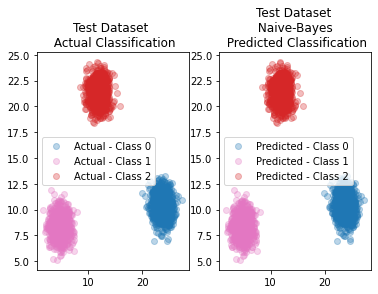

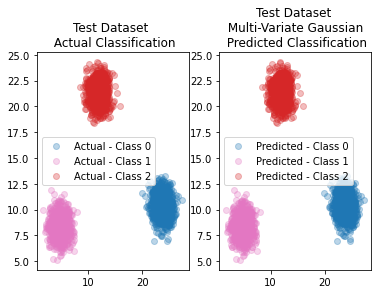

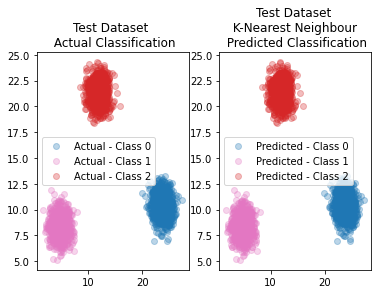

In [14]:
def getResults(TechniqueClass):
    actual = np.array(TechniqueClass.Test_pred_df.loc[:, 'y'])
    predicted = np.array(TechniqueClass.Test_pred_df.loc[:, 'y_pred'] )
    t.model.confusion_matrix = confusion_matrix(actual, predicted)
    return accuracy_score(actual, predicted)

techniques = [NB, MVG, KNN]
fig = [None] * len(techniques)
fig_count = 1
for t in techniques:
    print('Training and applying %s technique' % t.label)
    trainModel(t)
    makePredictions(t)
    figcount = plot_Actual_V_Predicted(t, n_classes, fig, fig_count)
    t.accuracy_score = getResults(t)
    print('%s accuracy score = %f' % (t.label, t.accuracy_score))
    print(t.label,'confusion matrix:\n', t.model.confusion_matrix , '\n\n')



